In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def obj_func(xk):
    """
    Objective function
    """
    x, y = xk
    return x ** 2 + x * y + 10 * y ** 2 - 22 * y - 5 * x


def obj_grad(xk):
    """
    Gradient of the objective function
    """
    x, y = xk
    return np.array([2 * x + y - 5, x + 20 * y - 22])

In [3]:
def backtrack(xk, fk, gfk, t):
    """
    Backtracking line search algorithm
    """
    assert t > 0, "'a' must be > 0"
    pk = -gfk
    gamma = 0.1
    beta = 0.5
    while obj_func(xk + t * pk) > fk + gamma * t * np.dot(gfk, pk):
        t = beta * t
    return t

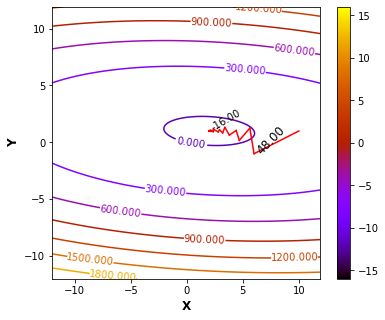


iters = 46
error = 0.0001
min val = -16.0000
x* = [2.0000179  1.00000333]


In [4]:
# Visualize contour plot of given surface
xy_lim = 12
x_axis = np.arange(-xy_lim, xy_lim, 0.1)
y_axis = np.arange(-xy_lim, xy_lim, 0.1)
x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)
surface = obj_func(np.array([x_mesh, y_mesh]))

# Setup colorbar
mappable = plt.cm.ScalarMappable(cmap=plt.cm.gnuplot)
mappable.set_array(surface)
mappable.set_clim(np.min(surface), -np.min(surface))

# Make plot
fig = plt.figure(figsize=(6, 5))
levels = plt.contour(x_mesh, y_mesh, surface, cmap="gnuplot")
plt.clabel(levels)
fig.colorbar(mappable)

# Initial guess
xk = np.array([10, 1])

error = 1e9
k = 0
while error > 1e-4:
    # Store to plot path
    prev = xk

    # Value of f at xk
    fk = obj_func(xk)
    # Gradient of f at xk
    gfk = obj_grad(xk)
    # Optimal step-size (argmin f)
    a = backtrack(xk, fk, gfk, 1)
    xk = xk - a * gfk

    # Table constructor for Org mode
    #     print("| %d" % (k + 1), "| %.2f" % xk[0], "| %.2f" % xk[1], "| %.4f |" % fk)
    error = np.linalg.norm(gfk, ord=2)

    # Plot path
    plt.plot([prev[0], xk[0]], [prev[1], xk[1]], color="red")
    if k == 0:
        plt.text(xk[0], xk[1], "%.2f" % fk, rotation=45, fontsize=12)

    k += 1

# Minimal value on the plot
plt.text(xk[0], xk[1], "%.2f" % fk, rotation=30, fontsize=10)
plt.xlabel("X", fontsize=12, fontweight=900)
plt.ylabel("Y", fontsize=12, fontweight=900)
plt.show()

print("\niters = %d" % k)
print("error = %.4f" % error)
print("min val = %.4f" % obj_func(xk))
print("x* =", xk)

In [5]:
def obj_func(xk, n=3):
    return 0.25 * (xk[0] - 1) ** 2 + sum(
        [(2 * xk[i - 1] ** 2 - xk[i] - 1) ** 2 for i in range(1, n)]
    )


def obj_grad(xk, n=3):
    grad = []
    for i in range(n):
        if i == 0:
            a = 0.5 * (xk[i] - 1)
            c = 0
        else:
            a = 0
            c = -2 * (2 * xk[i - 1] ** 2 - xk[i] - 1)

        if i == n - 1:
            b = 0
        else:
            b = 8 * xk[i] * (2 * xk[i] ** 2 - xk[i + 1] - 1)

        grad.append(a + b + c)
    return np.array(grad)

In [6]:
def backtrack(xk, fk, gfk, t):
    """
    Backtracking line search algorithm
    """
    assert t > 0, "'a' must be > 0"
    pk = -gfk
    gamma = 0.1
    beta = 0.1
    while obj_func(xk + t * pk, n=len(xk)) > fk + gamma * t * np.dot(gfk, pk):
        t = beta * t
    return t

In [7]:
n = 3
xk = np.concatenate([np.array([-1.5]), np.ones(n - 1)])

k = 0
error = 1e8
while error > 1e-4:
    prev = xk
    fk = obj_func(xk, n=n)
    gfk = obj_grad(xk, n=n)
    a = backtrack(xk, fk, gfk, 1)
    #     a = 0.1
    xk = xk - a * gfk
    error = np.linalg.norm(gfk, ord=2)
    #     error = np.linalg.norm(xk - prev, ord=2)
    k += 1

print("iters = %d" % k)
print("error = %.4f" % error)
print("min val = %.4f" % obj_func(xk))
print("x* =", np.round(xk, 4))

iters = 42401
error = 0.0001
min val = 0.0000
x* = [0.9971 0.9883 0.9533]


In [8]:
from scipy.optimize import minimize

In [9]:
xk = np.concatenate([np.array([-1.5]), np.ones(n - 1)])
minimize(obj_func, xk, method="SLSQP")

     fun: 3.9660415280602985e-07
     jac: array([ 0.00039315,  0.00435677, -0.00113261])
 message: 'Optimization terminated successfully'
    nfev: 272
     nit: 64
    njev: 64
  status: 0
 success: True
       x: array([0.99947401, 0.99781455, 0.99070143])